In [1]:
from __future__ import division
#
import os, sys
sys.path.append(os.getcwd()+'/..')
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
from supports._setting import individual_detail_dir
from supports.charts import multiple_line_chart

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Y09_general = pd.read_csv('%s/Y09-individual-general.csv' % (individual_detail_dir))
Y10_general = pd.read_csv('%s/Y10-individual-general.csv' % (individual_detail_dir))
#
Y09_prev_in = pd.read_csv('%s/Y09-individual-prev-in-ap.csv' % (individual_detail_dir))
Y10_prev_in = pd.read_csv('%s/Y10-individual-prev-in-ap.csv' % (individual_detail_dir))
Y09_prev_out = pd.read_csv('%s/Y09-individual-prev-out-ap.csv' % (individual_detail_dir))
Y10_prev_out = pd.read_csv('%s/Y10-individual-prev-out-ap.csv' % (individual_detail_dir))

In [3]:
# Filtering
HOUR, CENT = 60*60, 100
PROD_LIMIT = 65 / HOUR * CENT
#
Y09_general = Y09_general[(Y09_general['total-prod']  < PROD_LIMIT)]
Y10_general = Y10_general[(Y10_general['total-prod']  < PROD_LIMIT)]
#
Y09_prev_in = Y09_prev_in[(Y09_prev_in['ap-prod'] < PROD_LIMIT)]
Y10_prev_in = Y10_prev_in[(Y10_prev_in['ap-prod'] < PROD_LIMIT)]
#
Y09_prev_out = Y09_prev_out[(Y09_prev_out['ap-prod'] < PROD_LIMIT)]
Y10_prev_out = Y10_prev_out[(Y10_prev_out['ap-prod'] < PROD_LIMIT)]

In [4]:
# both years
Y09_did, Y10_did = set(Y09_general['did']), set(Y10_general['did'])
both_years_full_drivers = list(Y09_did.intersection(Y10_did))
#
Y09_general = Y09_general[Y09_general['did'].isin(both_years_full_drivers)]
Y10_general = Y10_general[Y10_general['did'].isin(both_years_full_drivers)]
#
Y09_prev_in = Y09_prev_in[Y09_prev_in['did'].isin(both_years_full_drivers)]
Y10_prev_in = Y10_prev_in[Y10_prev_in['did'].isin(both_years_full_drivers)]
#
Y09_prev_out = Y09_prev_out[Y09_prev_out['did'].isin(both_years_full_drivers)]
Y10_prev_out = Y10_prev_out[Y10_prev_out['did'].isin(both_years_full_drivers)]

In [5]:
Y09_general_gb, Y10_general_gb = Y09_general.groupby(['mm']), Y10_general.groupby(['mm'])
Y09_driver_general_prod = Y09_general_gb.mean()['total-prod'].to_frame('avg_total_prod').reset_index()
Y10_driver_general_prod = Y10_general_gb.mean()['total-prod'].to_frame('avg_total_prod').reset_index()
#
Y09_prev_in_gb, Y10_prev_in_gb = Y09_prev_in.groupby(['mm']), Y10_prev_in.groupby(['mm'])
Y09_prev_in_mm_ap_prod = Y09_prev_in_gb.mean()['ap-prod'].to_frame('avg_ap_prod').reset_index()
Y10_prev_in_mm_ap_prod = Y10_prev_in_gb.mean()['ap-prod'].to_frame('avg_ap_prod').reset_index()
#
Y09_prev_out_gb, Y10_prev_out_gb = Y09_prev_out.groupby(['mm']), Y10_prev_out.groupby(['mm'])
Y09_prev_out_mm_ap_prod = Y09_prev_out_gb.mean()['ap-prod'].to_frame('avg_ap_prod').reset_index()
Y10_prev_out_mm_ap_prod = Y10_prev_out_gb.mean()['ap-prod'].to_frame('avg_ap_prod').reset_index()


['0901', '0902', '0903', '0904', '0905', '0906', '0907', '0908', '0909', '0910', '0911', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1011', '1012']


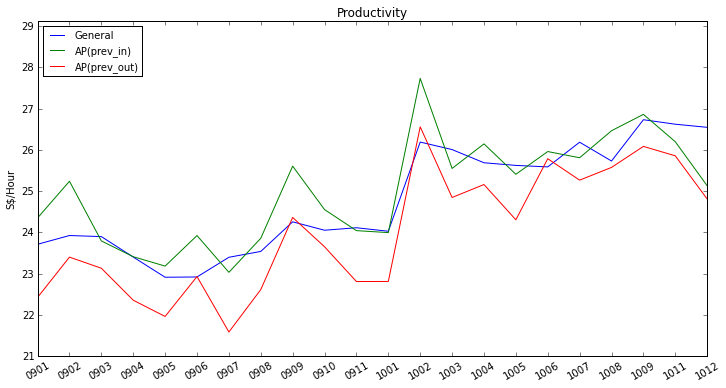

In [6]:
_xticks, multi_y_data = [], [[], [], []]
#
for _mm, general_prod in Y09_driver_general_prod.values:
    mm = int(_mm)
    _xticks.append('%02d%02d'%(9,mm))
    multi_y_data[0].append(general_prod * HOUR / CENT)
for _mm, general_prod in Y10_driver_general_prod.values:
    mm = int(_mm)
    _xticks.append('%02d%02d'%(10,mm))
    multi_y_data[0].append(general_prod * HOUR / CENT)
#
for _mm, ap_prod in Y09_prev_in_mm_ap_prod.values:
    mm = int(_mm)
    multi_y_data[1].append(ap_prod * HOUR / CENT)
for _mm, ap_prod in Y10_prev_in_mm_ap_prod.values:
    mm = int(_mm)
    multi_y_data[1].append(ap_prod * HOUR / CENT)
#
for _mm, ap_prod in Y09_prev_out_mm_ap_prod.values:
    mm = int(_mm)
    multi_y_data[2].append(ap_prod * HOUR / CENT)
for _mm, ap_prod in Y10_prev_out_mm_ap_prod.values:
    mm = int(_mm)
    multi_y_data[2].append(ap_prod * HOUR / CENT)
#
print _xticks
multiple_line_chart('Productivity', '', 'S$/Hour', range(len(_xticks)), multi_y_data, ['General','AP(prev_in)','AP(prev_out)'], 'upper left', _xticks)